In [58]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans

In [59]:
dataset = pd.read_csv("src/customers.csv")
print("Dataset loaded successfully")

Dataset loaded successfully


In [60]:
# Basic statistics and dataset overview
print(f"Number of rows: {dataset.shape[0]}")
print(f"Number of columns: {dataset.shape[1]}")
print()

# Display first few rows of the dataset
print(dataset.head())
print()

Number of rows: 440
Number of columns: 8

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185



In [61]:
numeric_features = dataset.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = dataset.select_dtypes(exclude=["int64", "float64"]).columns.tolist()
print("numeric_features:")
print(numeric_features)
print("\ncategorical_features:")
print(categorical_features)

numeric_features:
['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

categorical_features:
[]


Delete dataset's qualitatives variables

In [62]:
dataset.drop(["Channel", "Region"], axis = 1, inplace = True)

print(dataset.head())

   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0  12669  9656     7561     214              2674        1338
1   7057  9810     9568    1762              3293        1776
2   6353  8808     7684    2405              3516        7844
3  13265  1196     4221    6404               507        1788
4  22615  5410     7198    3915              1777        5185


Keep only Grocery and Milk columns

In [63]:
dataset_cleaned = dataset[["Grocery", "Milk"]]
print(dataset_cleaned.head())

   Grocery  Milk
0     7561  9656
1     9568  9810
2     7684  8808
3     4221  1196
4     7198  5410


Visualise datas via scatter plot

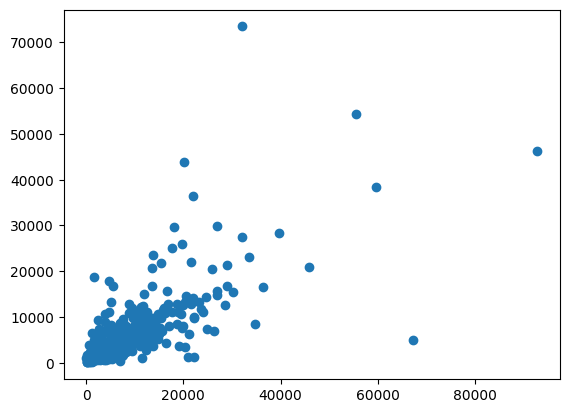

In [64]:
X = dataset_cleaned["Grocery"]
Y = dataset_cleaned["Milk"]

plt.scatter(X, Y)

plt.show()

In [65]:
# Création du graphique de dispersion
fig = px.scatter(
    dataset_cleaned,
    x='Grocery',
    y='Milk',
    title="Relation entre Grocery et Milk",
    labels={'Grocery': 'Dépenses en épicerie', 'Milk': 'Dépenses en lait'},
    template="plotly_white"
)

# Affichage du graphique
fig.show()

In [66]:
fig = px.scatter(dataset, 'Grocery', 'Milk')
fig.show()

Standardize datas

In [67]:
# Instanciation du scaler
scaler = StandardScaler()

# Ajustement et transformation des données
dataset_scaled = scaler.fit_transform(dataset_cleaned)


Define an instance of DBSCAN with the parameters eps = .5, min_samples = 15

In [68]:
db = DBSCAN(eps=5, min_samples=15)
db.fit(dataset_scaled)

DBSCAN(eps=5, min_samples=15)

Create a dbscan_predict object that contains the classes defined by DBSCAN

In [69]:
dataset_predict = db.fit_predict(dataset_scaled)

Visualize the data by coloring the points according to the class found by DBSCAN

In [70]:
# Création du graphique de dispersion
fig = px.scatter(
    dataset_scaled,
    x=0,                           # Colonne ou index pour l'axe X
    y=1,                           # Colonne ou index pour l'axe Y
    color=dataset_predict,            # Labels des clusters pour la couleur
    title="Résultats de DBSCAN",   # Titre du graphique
    labels={"x": "Feature 0", "y": "Feature 1", "color": "Cluster"},  # Étiquettes
    template="plotly_white"        # Template pour un rendu propre
)

# Affichage du graphique
fig.show()

In [71]:
fig = px.scatter(dataset_scaled, x = 0, y = 1, color = dataset_predict)
fig.show()